In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_examination.csv',index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
copy_df = df.copy()
copy_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
copy_df['height in meter'] = copy_df['height']/100
copy_df['overweight'] = copy_df['weight']/(copy_df['height in meter']*copy_df['height in meter'])
copy_df['overweight'].head()

id
0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: overweight, dtype: float64

In [5]:
#copy_df["overweight"]= pd.cut(df['overweight'], [-np.inf, 25, np.inf], labels=(0,1))

In [6]:
copy_df.sort_index(inplace=True)
copy_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height in meter,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177


#### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [7]:
#copy_df.where(copy_df['overweight'] > 25, int(0), inplace=True)
copy_df['overweight'] = (copy_df['overweight'] > 25) * 1
copy_df.drop(['height in meter'],axis=1,inplace = True)

In [8]:
copy_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


#### Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [9]:
copy_df['gluc'] = (copy_df['gluc'] > 1) * 1
copy_df['cholesterol'] = (copy_df['cholesterol'] > 1) * 1
copy_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [10]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc',
#'smoke', 'alco', 'active', and 'overweight'.

In [11]:
copy_df=pd.melt(copy_df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

In [12]:
copy_df.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


<AxesSubplot:xlabel='variable', ylabel='value'>

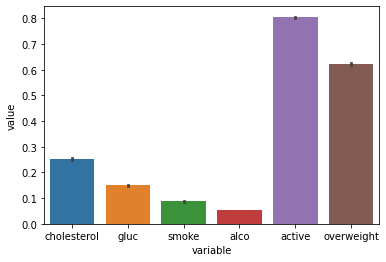

In [13]:
sns.barplot(x='variable',y='value',data=copy_df)

#### Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

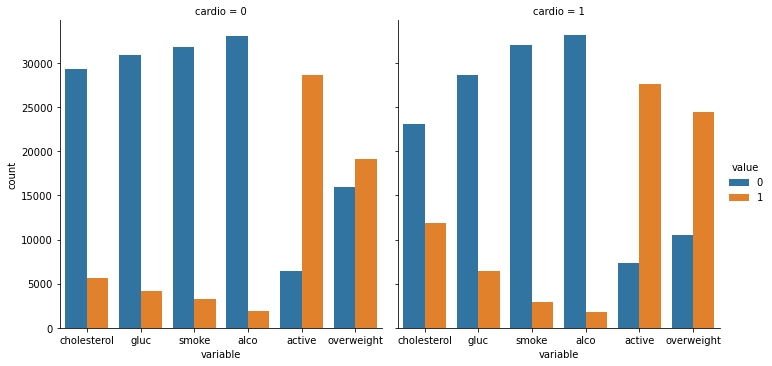

In [14]:
sns.catplot(x='variable',kind='count',hue='value',data=copy_df,col='cardio')

In [15]:
df.shape

(70000, 12)

In [16]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Clean the data. Filter out the following patient segments that represent incorrect data:

#### diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [17]:
#df['ap_lo'] <= df['ap_hi'])
df[df['ap_hi'] < df['ap_lo']] .head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
357,18217,1,150,83.0,140,800,1,1,0,0,1,1
458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
482,18704,1,154,81.0,140,1000,2,1,0,0,1,1


In [18]:
df.loc[(df['ap_hi'] < df['ap_lo'], 'ap_lo')] = np.NaN

In [19]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80.0,1,1,0,0,1,0
1,20228,1,156,85.0,140,90.0,3,1,0,0,1,1
2,18857,1,165,64.0,130,70.0,3,1,0,0,0,1
3,17623,2,169,82.0,150,100.0,1,1,0,0,1,1
4,17474,1,156,56.0,100,60.0,1,1,0,0,0,0


In [20]:
df.loc[(df['ap_hi'] < df['ap_lo'], 'ap_lo')]

Series([], Name: ap_lo, dtype: float64)

In [21]:
#df.loc[df['ap_lo'] <= df['ap_hi'],'ap_hi')] = np.NaN

In [22]:
df.dropna(axis=0,inplace=True)

In [23]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80.0,1,1,0,0,1,0
1,20228,1,156,85.0,140,90.0,3,1,0,0,1,1
2,18857,1,165,64.0,130,70.0,3,1,0,0,0,1
3,17623,2,169,82.0,150,100.0,1,1,0,0,1,1
4,17474,1,156,56.0,100,60.0,1,1,0,0,0,0


#### height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

In [24]:
#(df['height'] >= df['height'].quantile(0.025)))
df.loc[(df['height'] < df['height'].quantile(0.025))] = np.NaN
df.dropna(axis=0,inplace=True)

In [25]:
df.head()
df.shape

(67260, 12)

#### height is more than the 97.5th percentile

In [26]:
#height is more than the 97.5th percentile
df.loc[(df['height'] > df['height'].quantile(0.975))] = np.NaN
df.dropna(axis=0,inplace=True)

In [27]:
df.shape

(65859, 12)

#### weight is less than the 2.5th percentile

In [28]:
#weight is less than the 2.5th percentile
df.loc[(df['weight'] < df['weight'].quantile(0.25))] = np.NaN
df.dropna(axis=0,inplace=True)

In [29]:
df.shape

(49946, 12)

#### weight is more than the 97.5th percentile

In [30]:
df.loc[(df['weight'] > df['weight'].quantile(0.975))] = np.NaN
df.dropna(axis=0,inplace=True)

In [31]:
df.shape

(48902, 12)

#### Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [32]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.037063,-0.099811,0.042310,0.013778,0.128591,0.155508,0.097139,-0.056283,-0.033093,-0.010324,0.220869
gender,-0.037063,1.000000,0.527773,0.068109,0.001958,0.043379,-0.050884,-0.030371,0.330839,0.163290,0.011139,-0.010177
height,-0.099811,0.527773,1.000000,0.098514,-0.000886,-0.023983,-0.090557,-0.045376,0.189889,0.086090,-0.001125,-0.054698
weight,0.042310,0.068109,0.098514,1.000000,0.015730,0.185600,0.141012,0.092703,0.045698,0.051436,-0.010036,0.142013
ap_hi,0.013778,0.001958,-0.000886,0.015730,1.000000,0.064787,0.018901,0.009312,-0.002920,-0.000766,-0.000046,0.044314
ap_lo,0.128591,0.043379,-0.023983,0.185600,0.064787,1.000000,0.153180,0.063925,0.020913,0.030629,0.004556,0.313200
cholesterol,0.155508,-0.050884,-0.090557,0.141012,0.018901,0.153180,1.000000,0.441492,0.000977,0.030078,0.009627,0.216034
gluc,0.097139,-0.030371,-0.045376,0.092703,0.009312,0.063925,0.441492,1.000000,-0.011997,0.006160,-0.011436,0.081765
smoke,-0.056283,0.330839,0.189889,0.045698,-0.002920,0.020913,0.000977,-0.011997,1.000000,0.338286,0.025585,-0.019177
alco,-0.033093,0.163290,0.086090,0.051436,-0.000766,0.030629,0.030078,0.006160,0.338286,1.000000,0.024440,-0.010083


In [33]:
df_heat = df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))
    ].reset_index()
    
corr = df_heat.corr()

<AxesSubplot:>

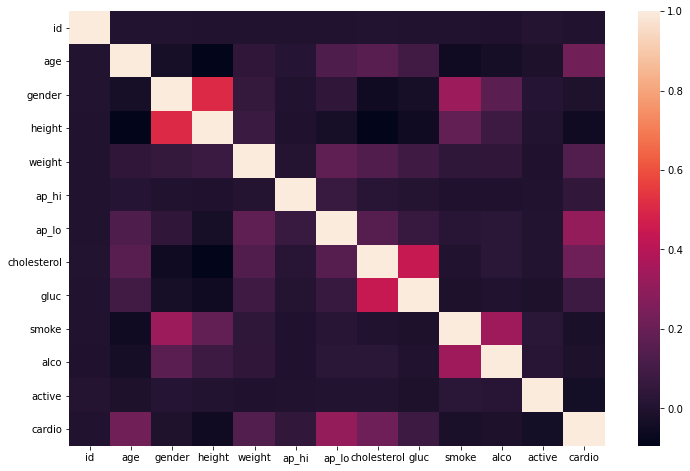

In [34]:
plt.figure(figsize = (12,8))

#create heatmap
sns.heatmap(corr)

<AxesSubplot:>

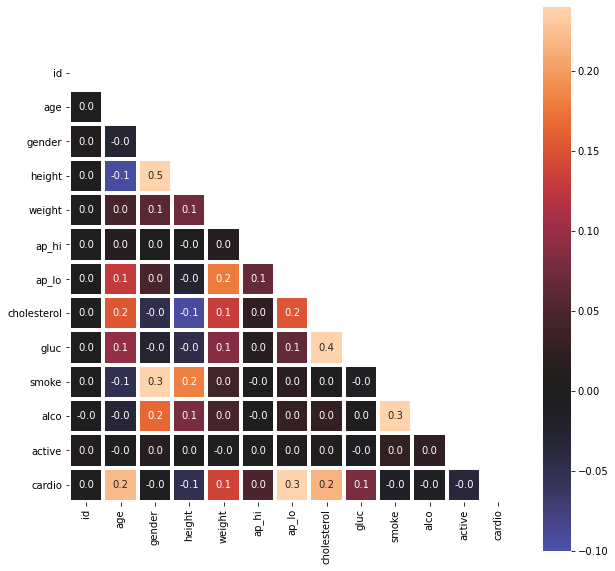

In [35]:
#annot=True, mask=mask mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize = (10,10))
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, annot=True, mask=mask,fmt='.1f',vmin=-0.1,vmax=.24,
            linewidths=3,linecolor='white',square=True,center=0)


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv',index_col=0)


# Add 'overweight' column
df['overweight'] = df['weight']/(df['height']/100)**2

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['overweight'] = (df['overweight'] > 25) * 1
df['gluc'] = (df['gluc'] > 1) * 1
df['cholesterol'] = (df['cholesterol'] > 1) * 1


# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    #df_cat = None

    # Draw the catplot with 'sns.catplot()'
    figure = sns.catplot(x='variable',kind='count',hue='value',data=df_cat,col='cardio')
    figure.set_axis_labels('variable','total')
    fig = figure.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))
    ].reset_index()
    

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr,dtype=bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10,10))

    # Draw the heatmap with 'sns.heatmap()'

    sns.heatmap(corr, annot=True, mask=mask,fmt='.1f',vmin=-0.1,vmax=.24,linewidths=3,linecolor='white',square=True,center=0)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
